In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('C:\\Users\\VARKEY JOSHY T\\Desktop\\Task2\\Mall_Customers.csv')

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [35]:
df.drop_duplicates(inplace = True)
print ("Data shape after dropping duplicates {}".format(df.shape))

Data shape after dropping duplicates (200, 5)


C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_19444\174260746.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


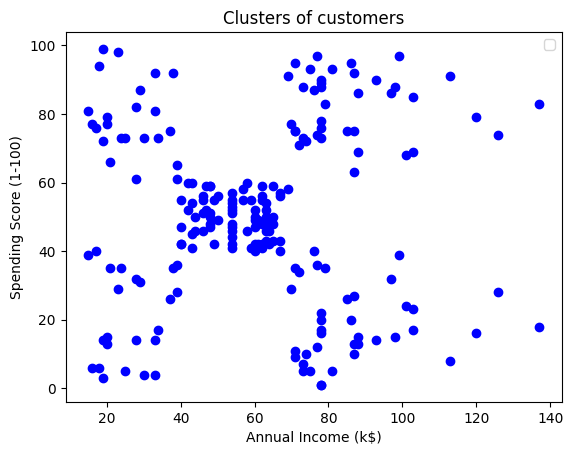

In [37]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='blue')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best')
plt.show()

In [39]:
# Feature data
X=df.iloc[:,[3,4]].values
print(X.shape)

(200, 2)


In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

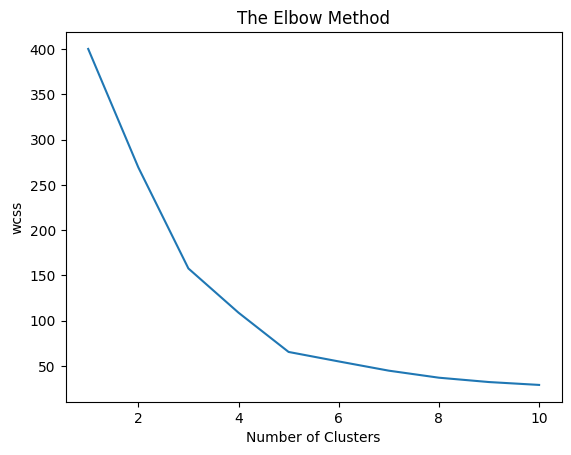

In [41]:
from sklearn.cluster import KMeans
wcss=[] #With in cluster sum of squers(Inertia)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++",max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [42]:
# Applying k-mean to dataset
kmeans=KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
# Predcit cluster labels
y_kmeans=kmeans.fit_predict(X) #kmeans.labels_
print(y_kmeans)
print ("Unique no of Clusters {}".format(np.unique(y_kmeans)))

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Unique no of Clusters [0 1 2 3 4]


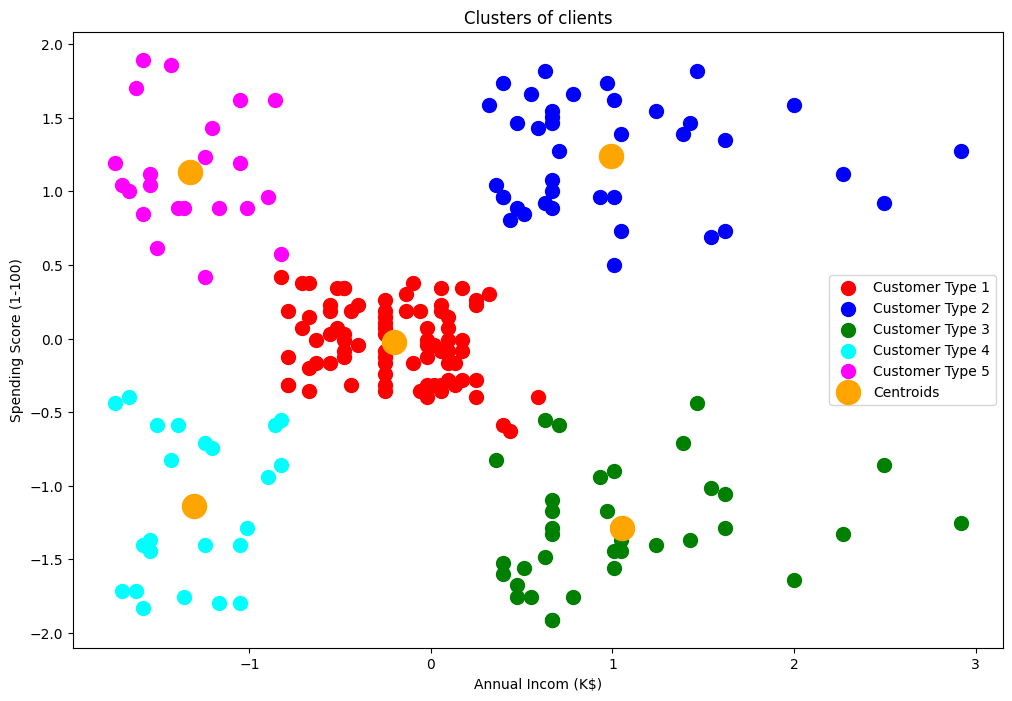

In [43]:
# Visualising the clusters
plt.figure(figsize = (12, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "red", label = "Customer Type 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "blue", label = "Customer Type 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "green", label = "Customer Type 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "cyan", label = "Customer Type 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = "magenta", label = "Customer Type 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "orange", label = "Centroids")
plt.title("Clusters of clients")
plt.xlabel("Annual Incom (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()